In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")

In [4]:
df.shape

(450, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [6]:
df.head(3)

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan


# DAY 4

In [7]:
# 1. How many different companies are represented in the data set?

print(f"There are {df['Company Name'].nunique()} unique companies represented in the dataset")

There are 439 unique companies represented in the dataset


In [8]:
# 2. What is the total number of jobs created for businesses in Queens?

jobs_created_Queens = df.loc[df.City=='Queens', 'Job created'].sum().astype(int)
print(f"There were {jobs_created_Queens} jobs created for businesses in Queens")

There were 90 jobs created for businesses in Queens


In [9]:
# 3. How many different unique email domain names are there in the data set?

email_domains = df['company email'].str.split('@', expand=True).iloc[:, 1].nunique()
print(f"There are {email_domains} unique email domain names in the data set")

There are 357 unique email domain names in the data set


In [10]:
# 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

NTA_companies = df.groupby('NTA')['Company Name'].nunique().sort_values(ascending=False)
large_NTAs = NTA_companies[NTA_companies>=5].index.tolist()
large_NTAs_filter = df.NTA.isin(large_NTAs)
df_savings_jobs = df[large_NTAs_filter].groupby('NTA').agg({'Total Savings':'mean', 'Job created':sum}) \
                    .sort_values('Total Savings', ascending=False)
df_savings_jobs.columns = ['Average Savings', 'Total Jobs Created']
df_savings_jobs['Total Jobs Created'] = df_savings_jobs['Total Jobs Created'].astype(int)
df_savings_jobs

,Average Savings,Total Jobs Created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,0
Queensbridge-Ravenswood-Long Island City,61830.770625,0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0
East New York,48433.093333,15
Hunts Point,39246.016154,12
SoHo-TriBeCa-Civic Center-Little Italy,37214.024000,0
Bushwick South,26140.455000,10
Carroll Gardens-Columbia Street-Red Hook,24337.390000,0
Hunters Point-Sunnyside-West Maspeth,23931.398933,0


In [11]:
# 5. Save your result for the previous question as a CSV file.

df_savings_jobs.to_csv("top_NTAs_savings_jobs.csv", index=True)

# DAY 5

### Note: it's not totally clear in the instructions, but I assumed the visualizations are supposed to be based on the CSV we generated and saved on Day 4, rather than the raw dataset.

In [12]:
df_savings_jobs = pd.read_csv("top_NTAs_savings_jobs.csv")

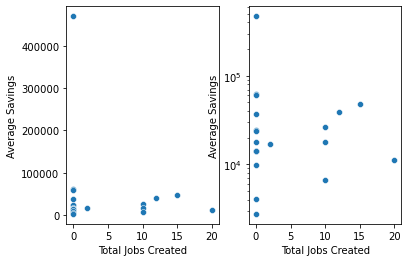

In [13]:
# 1. scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

plt.subplot(1,2,1)
sns.scatterplot(x='Total Jobs Created', y='Average Savings', data=df_savings_jobs)

plt.subplot(1,2,2)
ax = sns.scatterplot(x='Total Jobs Created', y='Average Savings', data=df_savings_jobs)
ax.set(yscale="log");

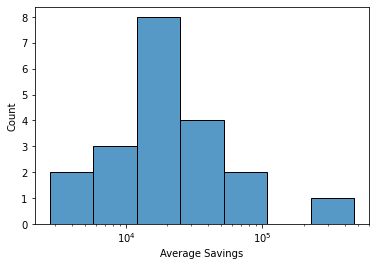

In [14]:
# 2. histogram of the log of the average total savings.

sns.histplot(df_savings_jobs['Average Savings'], log_scale=True);

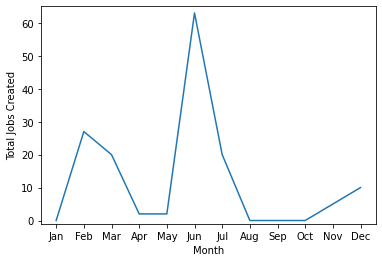

In [17]:
# 3. line plot of the total jobs created for each month.
# Note: for this one, have to use the original CSV rather than the one I created for Day 4.

df['Month'] = pd.to_datetime(df['Effective Date']).dt.month

df_jobs_by_month = df.groupby('Month')['Job created'].sum().astype(int).reset_index()
df_jobs_by_month.columns = ['Month', 'Total Jobs Created']

month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
              7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

df_jobs_by_month['Month'] = df_jobs_by_month.Month.map(month_dict)

sns.lineplot(x='Month', y='Total Jobs Created', data=df_jobs_by_month)
plt.ylim((-1,65));